# Calculating the Probability with CDF

We want to determine the probability that someone from the human population would have a height as large as our potential alien (or greater). In other words, what % of the probability (pdf) of our distribution has a height equal to or greater than our potential alien (78 inches)?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

data = males['Height']
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [2]:
#Define the low and high end of our range.  
#Since we will include anything above 78, we will set the high end as our maximum.

low_end = 78
high_end = max

#Define the range for our normal cdf using our max and min
x_range = np.linspace(min, max, 1000)

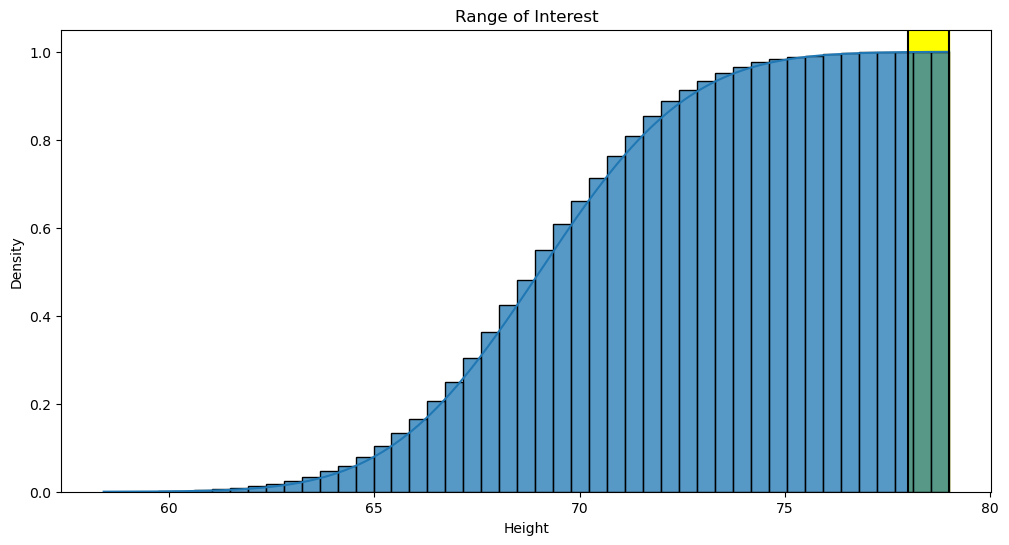

In [3]:
#show cdf plot
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

# Do the calculation:

Note that even though we defined a 'high_end' for the purpose of our visual, we technically want to include any value in our distribution that is greater than or equal to 78.   While we didn't need a high level of detail to conceptually understand our visual, we wanted to take advantage of the ability to make accurate calculations.  Therefore, we will get the most accurate results of "equal to or greater than 78" by subtracting from 1. 

In [4]:
## to get the probability of 78 inches OR TALLER get the cumulative sum of # the pdf up until 78
1-stats.norm.cdf(78, loc=np.mean(data), scale= np.std(data))

## There is a probability of .00086 (or a 0.086% chance) that a human male 
## would have a height equal to or taller than our potential alien.
## This probability of observing this specific value is our p-value!

0.000861409975311811

# Interpreting our p-value (comparing it to alpha)

So, technically, there IS a chance that this alien is actually human (p=.0008), but it's VERY unlikely.  So how unlikely is enough? What is the cutoff point?

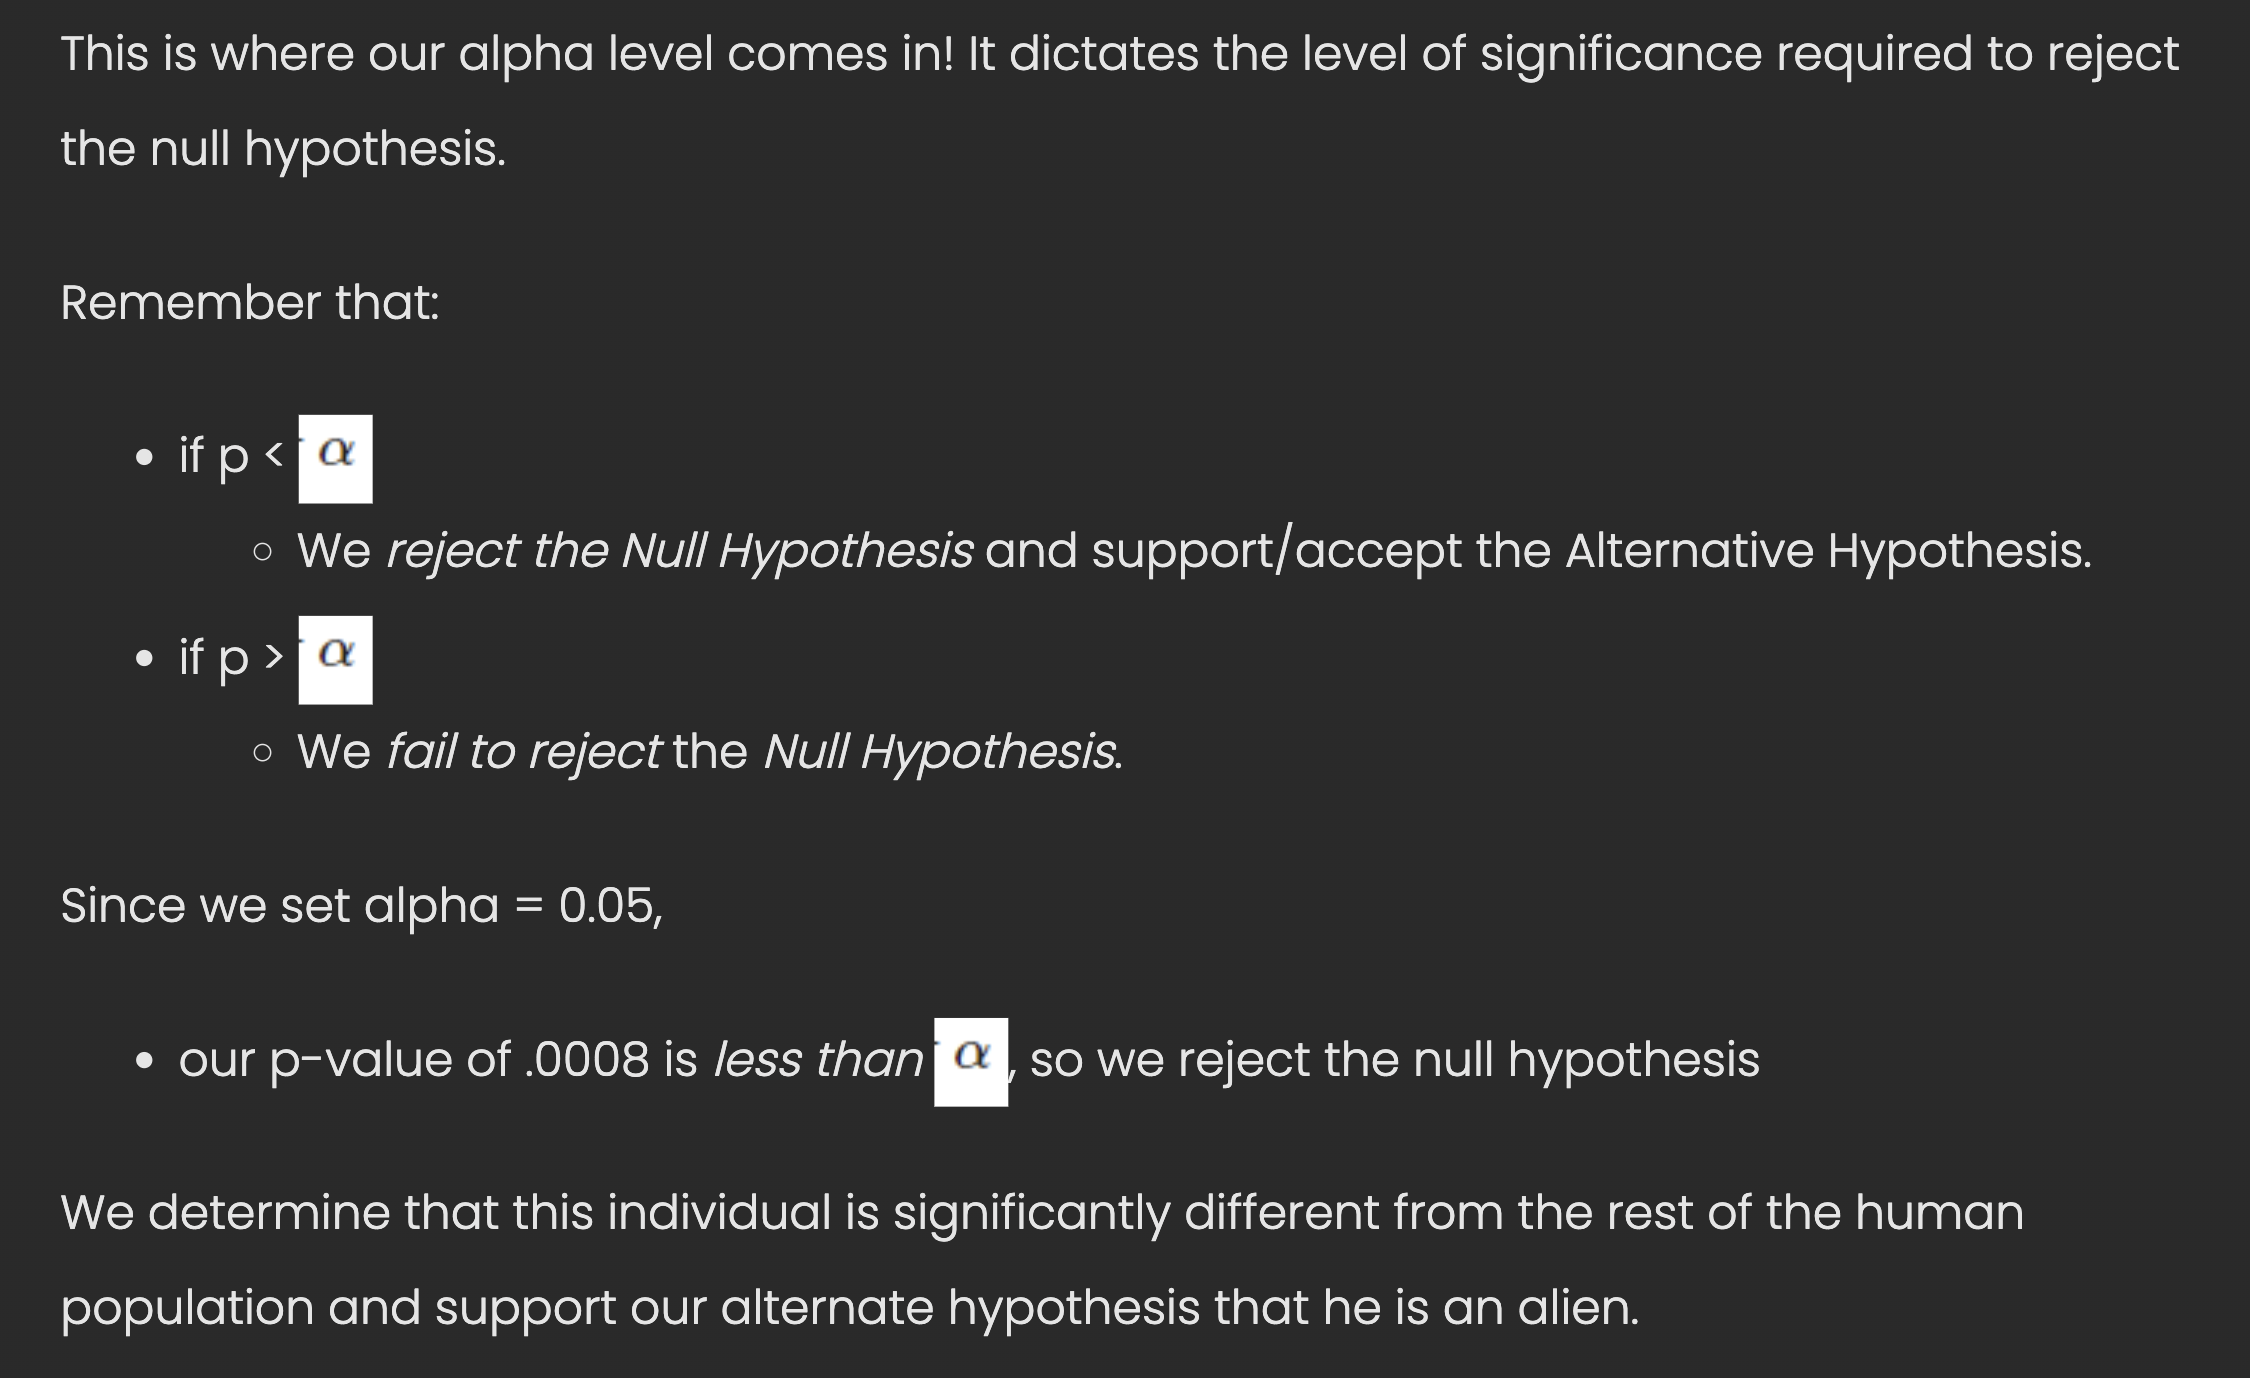

# Summary

This lesson started by reviewing type 1 and type 2 errors because we want to consider how these errors are related to our study.  These considerations can be used when determining the significance level (alpha) for our test.  The most common alpha value is 0.05, but the alpha value is ultimately determined by the researcher for a given test.  As the alpha gets smaller, the likelihood of rejecting the null hypothesis and supporting your alternative goes down.  Once your alpha is established,  we will then calculate a p-value. We compare the p-value to the established alpha value to determine if we have a "significant" finding.  If our p-value is less than alpha, we can reject the null hypothesis and claim to have a "significant" finding.  